In [10]:
import yfinance as yf
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns
import pynance as pn

In [11]:
df = pd.read_csv("../data/AAPL_historical_data.csv")

In [12]:
# Convert Date to datetime and set as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)
df = df.sort_index()  # sort


In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [14]:
# Simple Moving Average (SMA 20)
df["SMA_20"] = talib.SMA(df["Close"], timeperiod=20)
df['SMA50'] = df['Close'].rolling(window=50).mean()


In [15]:
# Relative Strength Index (RSI)
df["RSI_14"] = talib.RSI(df["Close"], timeperiod=14)

In [16]:
# Moving Average Convergence Divergence (MACD)
df["MACD"], df["MACD_signal"], _ = talib.MACD(df["Close"], fastperiod=12, slowperiod=26, signalperiod=9)

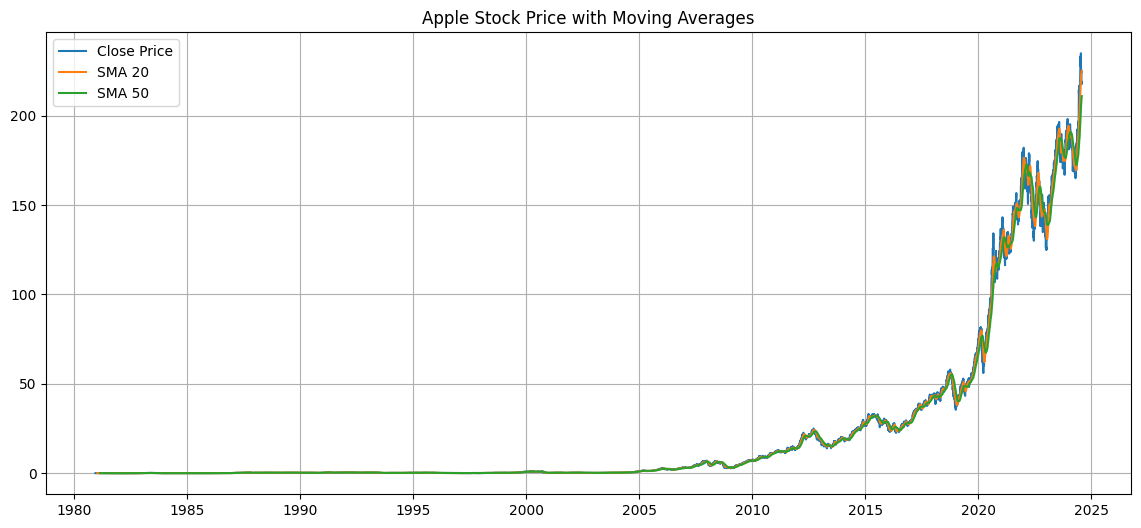

In [17]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['SMA20'], label='SMA 20')
plt.plot(df['SMA50'], label='SMA 50')
plt.legend()
plt.title("Apple Stock Price with Moving Averages")
plt.grid(True)
plt.show()


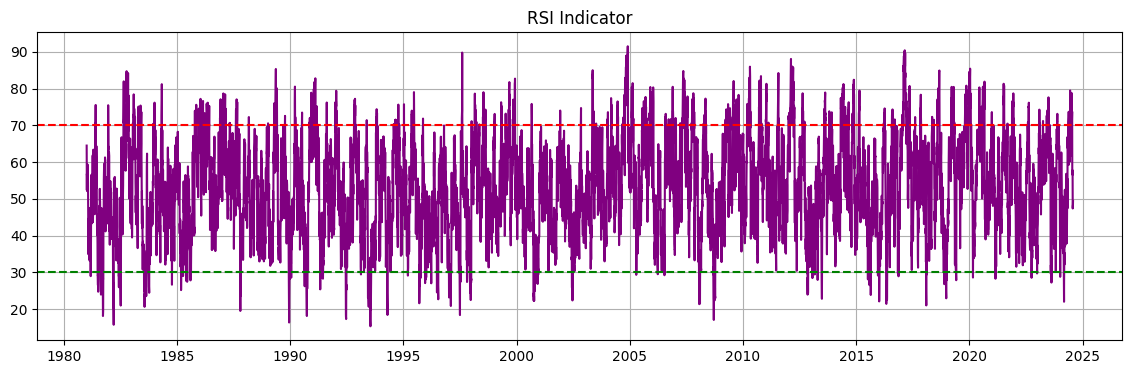

In [19]:
plt.figure(figsize=(14, 4))
plt.plot(df['RSI_14'], color='purple')
plt.axhline(70, linestyle='--', color='red')
plt.axhline(30, linestyle='--', color='green')
plt.title("RSI Indicator")
plt.grid(True)
plt.show()

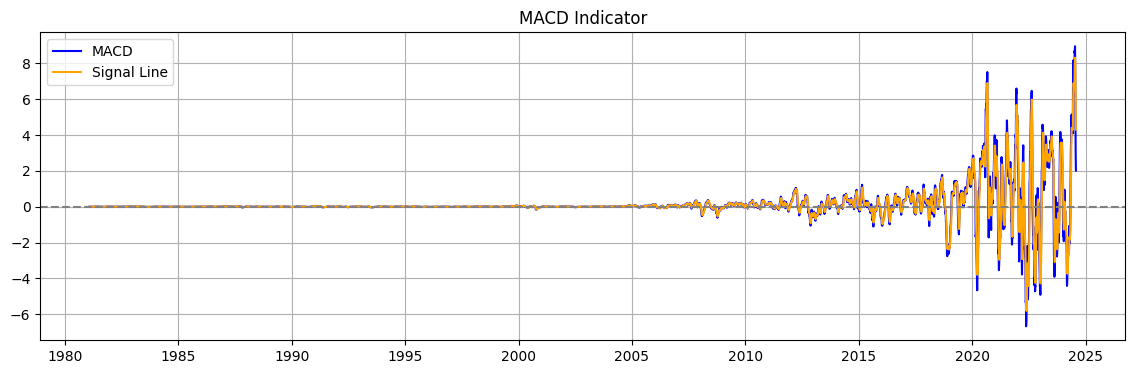

In [21]:
plt.figure(figsize=(14, 4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_signal'], label='Signal Line', color='orange')
plt.axhline(0, linestyle='--', color='gray')
plt.legend()
plt.title("MACD Indicator")
plt.grid(True)
plt.show()